# Finanças Quantitativas

Lucas Emanuel Resck Domingues

## Lista 1

**Referência**: Carmona, René. Statistical analysis of financial data in R, 2014.

### Problema 1.1

Ambas $F_1$ e $F_2$ são monótonas crescentes e $\forall x \ F_1(x) \le F_2(x)$. Sejam $X$ e $Y$ o conjunto de $x, y \in \mathbb{R}$, respectivamente, que satisfazem $p = F_1(x) = F_2(y)$, para algum $p$ entre $0$ e $1$. Justamente pela definição de quantil, buscamos $\pi_p^{(1)} = \textrm{inf}\{x \in X\}$ e $\pi_p^{(2)} = \textrm{inf}\{y \in Y\}$. Ora, podemos dizer que $\pi_p^{(1)} \ge \pi_p^{(2)}$ (a demonstração prova-se por absurdo: assume-se que exista algum $p$ que não satisfaz a inequação, e mostra-se que $F_1(x) \le F_2(x)$ não é satisfeito).

Feito isso, podemos concluir que:

1. Em um GG-plot, com $\pi_p^{(1)}$ na abscissa e $\pi_p^{(2)}$ na ordenada, no lado esquerdo do gráfico teremos pontos abaixo de $y=x$. Ou seja, para uma mesma área, $F_2$ "leva em quantis maiores (em valor absoluto)", portanto possui cauda esquerda mais pesada.

2. No lado direito do gráfico teremos pontos abaixo de $y=x$. Portanto, $F_1$ possui cauda direita mais pesada.

Seguimos com:

3. Como $-VaR$ é um quantil da distribuição do retorno, $F_1$ tem maior $-VaR$ e menor $+VaR$. Ou seja, $F_2$ entrega maior *Value at Risk*.

Para se guiar, observe um exemplo de $F_1$ e $F_2$ no gráfico abaixo.

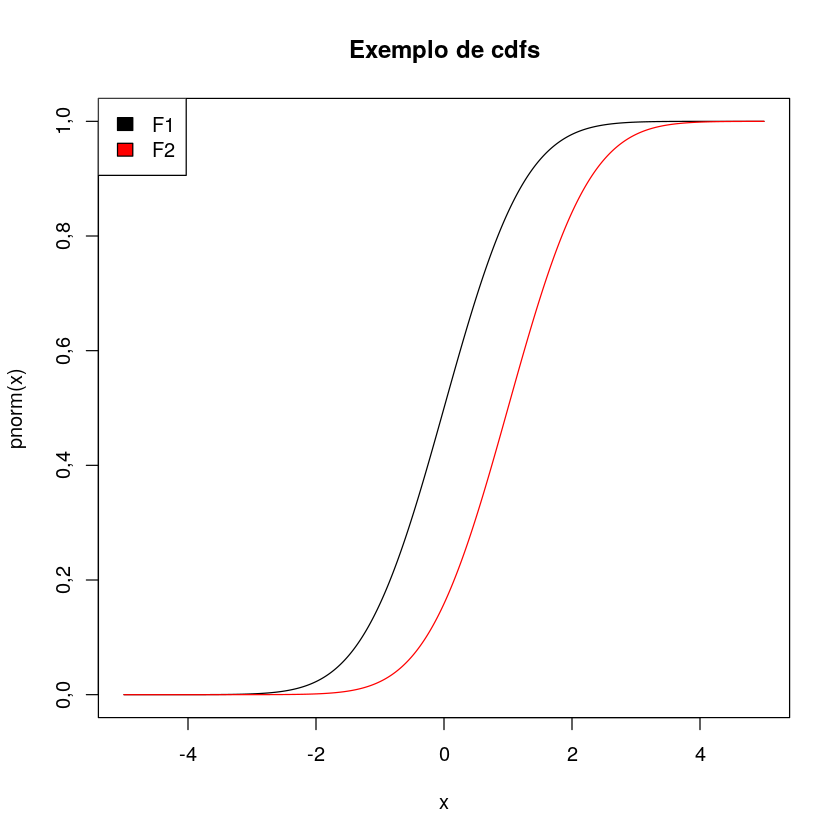

In [5]:
x = seq(-5, 5, 0.01)
plot(x, pnorm(x), type="l", main="Exemplo de cdfs", col=1)
lines(x, pnorm(x, 1), col=2)
legend("topleft", c("F1", "F2"), fill=c(1, 2))

### Problema 1.2

In [13]:
# 1
X = rexp(1024, 0.2)
X[1:5]

[1] 6,2245377 5,6287517 0,9519894 1,3581765 2,8022048

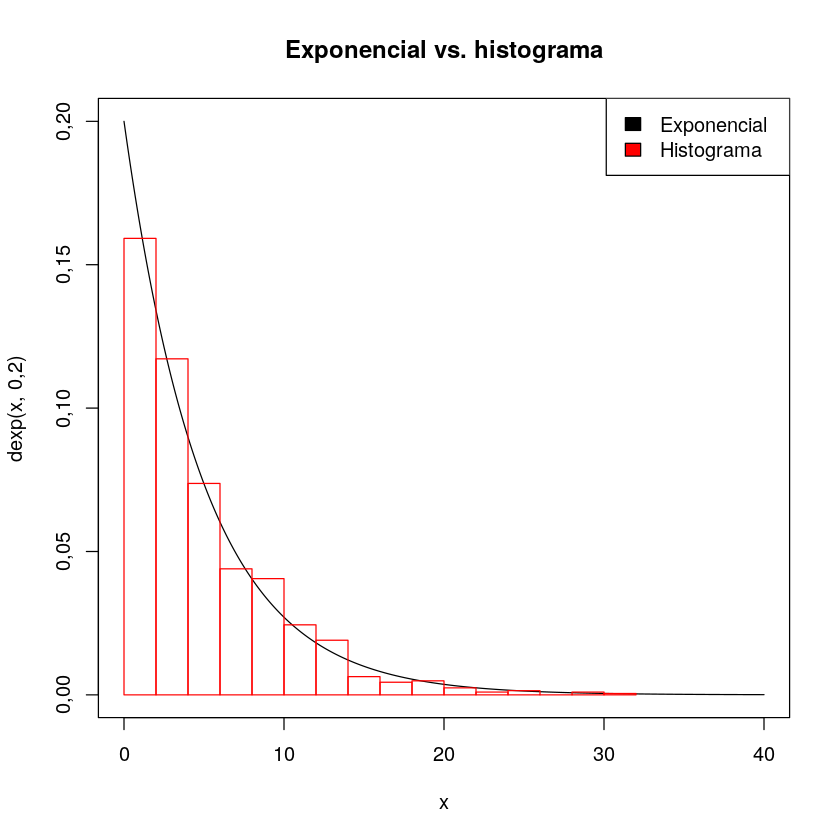

In [21]:
# 2
x = seq(0, 40, 0.1)
plot(x, dexp(x, 0.2), type="l", col=1, main='Exponencial vs. histograma')
hist(X, add=T, freq=F, border=2)
legend("topright", c("Exponencial", "Histograma"), fill=c(1, 2))

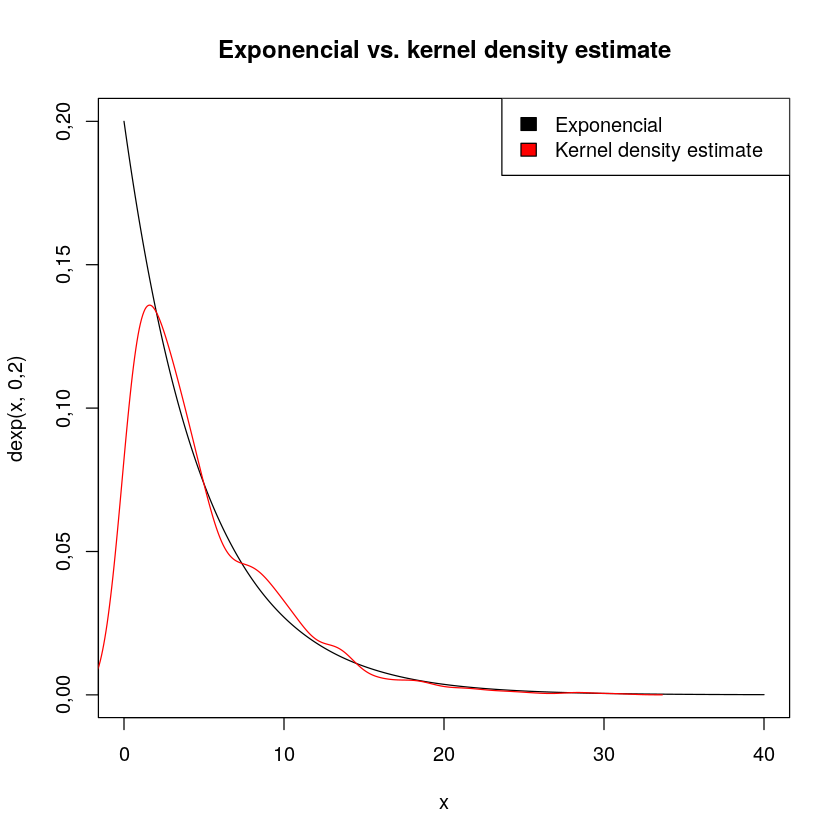

In [38]:
# 3
x = seq(0, 40, 0.1)
plot(x, dexp(x, 0.2), type="l", col=1, main='Exponencial vs. kernel density estimate')
lines(density(X, 1), col=2)
legend("topright", c("Exponencial", "Kernel density estimate"), fill=c(1, 2))

4. - No plot com o histograma, podemos ver que a função que gera a curva não é suave, diferentemente do plot com o *kernel density estimate* (utilizando um kernel gaussiano);
   - Como não há amostras com valor menor do que zero e a função kernel do *kde* é uma gaussiana, sua curva acaba por subir de valores próximos ao zero, enquanto a curva original já se inicia em 0,20. Ou seja, para valores de x muito próximos de zero, temos estimativas muito ruins para o *kde*.
   - O histograma, diferentemente do *kde*, não se centra na amostra, podendo não aproximar muito bem a distribuição teórica.
   
   Me parece mais razoável a utilização da *kde*.

### Problema 1.3

1. ***Quantiles of Standard Normal* x YY**: Os pontos, à direita no gráfico, estão acima de $y = x$; à esquerda, estão abaixo. Concluímos que YY tem caudas direita e esquerda mais pesadas que a normal padrão.

2. ***Quantiles of Standard Normal* x ZZ**: Os pontos, à direita no gráfico, estão próximos de $y = x$; à esquerda, estão abaixo. Não pode-se dizer muito sobre a cauda direita de ZZ, mas sabemos que sua cauda esquerda é mais pesada que a da normal padrão.

3. **XX x TT**: Pelo mesmo raciocínio, TT tem cauda direita mais pesada, porém XX tem cauda esquerda mais pesada.

4. **TT vs. EE**: Não se pode dizer muito sobre as caudas esquerdas, mas TT tem cauda direita mais pesada.

### Problema 1.4

1.1. **XX**: XX tem cauda direita mais pesada e cauda esquerda mais leve, em comparação à normal.

1.2. **YY**: YY tem caudas direita e esquerda mais pesadas do que a normal.

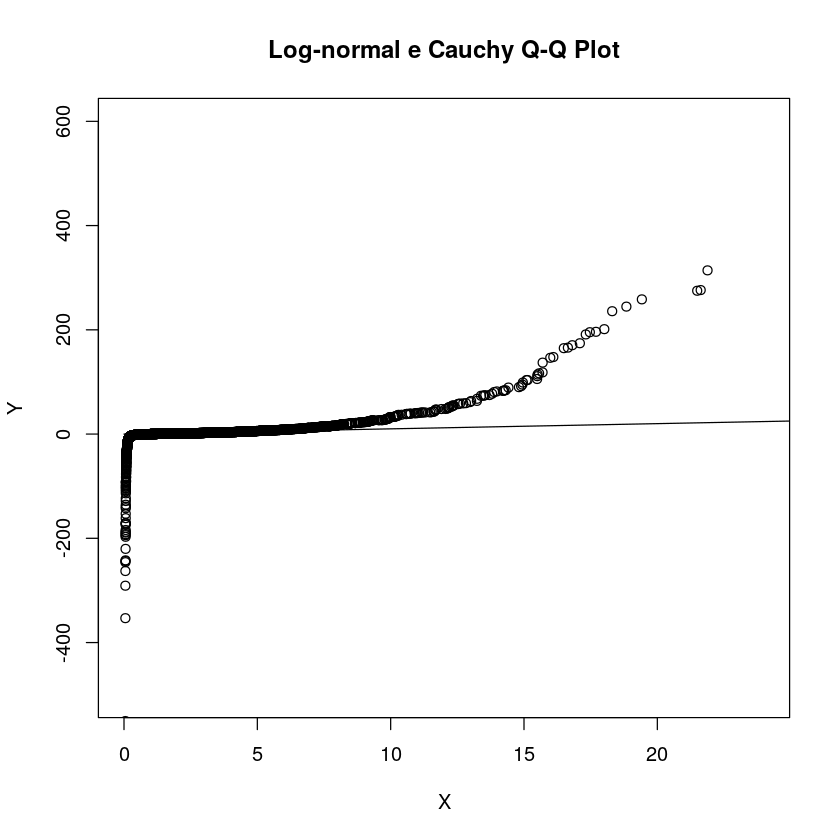

In [55]:
# 2.1

X = rlnorm(10000)
Y = rcauchy(10000)
qqplot(X, Y, xlim=c(0, 24), ylim=c(-500, 600), main="Log-normal e Cauchy Q-Q Plot")
lines(seq(0, 30), seq(0, 30))

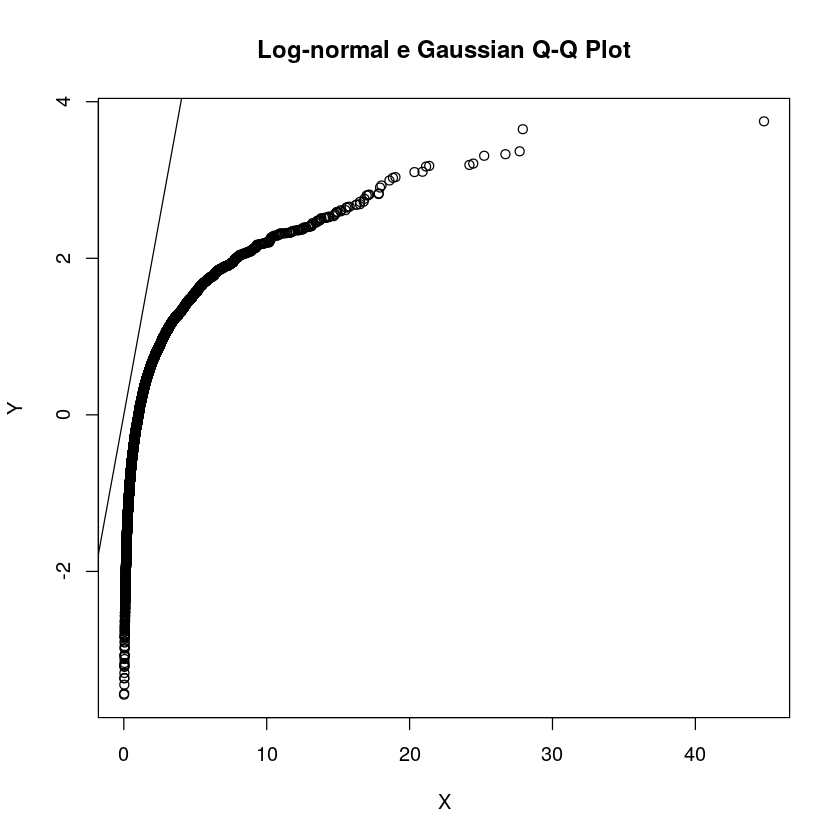

In [58]:
# 2.2

X = rlnorm(10000)
Y = rnorm(10000)
qqplot(X, Y, main="Log-normal e Gaussian Q-Q Plot")
lines(seq(-10, 50), seq(-10, 50))

### Problema 1.9

In [93]:
# 1
myrexp = function(N, LAMBDA) {
    Y = runif(N)
    X = - 1/LAMBDA * log(1 - Y)
    return(X)
}

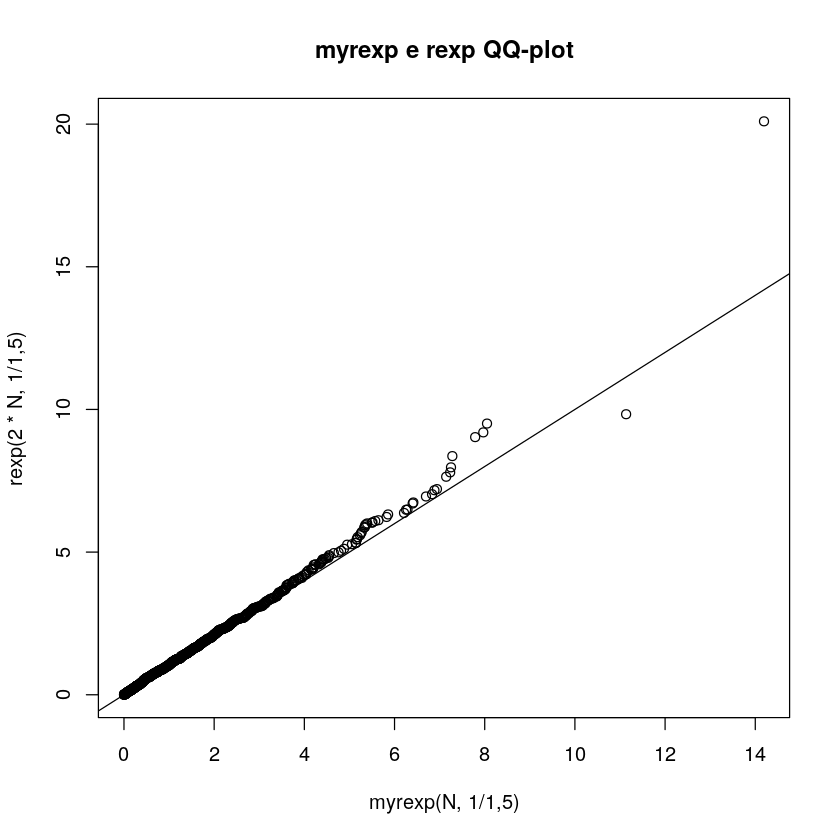

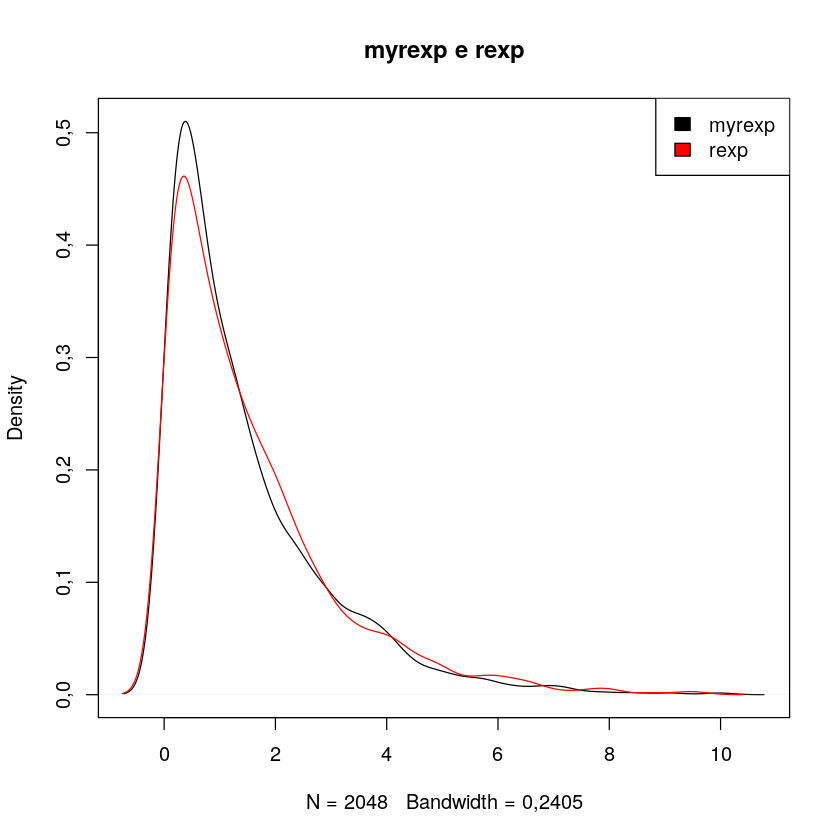

In [112]:
# 2
N = 1024
qqplot(myrexp(N, 1/1.5), rexp(2*N, 1/1.5), main="myrexp e rexp QQ-plot")
lines(seq(-1, 15), seq(-1, 15))
plot(density(myrexp(2*N, 1/1.5)), col=1, main="myrexp e rexp")
lines(density(rexp(2*N, 1/1.5)), col=2)#, add=T)
legend("topright", c("myrexp", "rexp"), fill=c(1, 2))

A função de simulação se saiu muito bem, principalmente próximo à moda da distribuição (onde possui muitas amostras), pois os quantis têm valores muito próximos.